# Decision trees - Binary Classification

Note

In this class we attempt to follow the same flow (whenever possible or applicable) to ensure proper pipelines
* 0. Setup
* 1. Data Loading and Exploration
* 2. Data Processing
* 3. Model Building
* 4. Evaluation

## 0. Setup

In this notebook, we'll explore Decision Trees for classification using the Palmer Penguins dataset.

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 1. Data Loading and Exploration

Let's start by loading our dataset and exploring its characteristics.

### The Data

We are going to use the 'Palmer Penguins' dataset because penguins are funny creatures. More info can be found at https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

<img src="penguin.jpg" style="max-width:400px">


Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

In [219]:
# load the data
df = pd.read_csv("datasets/penguins_size.csv")

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [221]:
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


Visualize the data

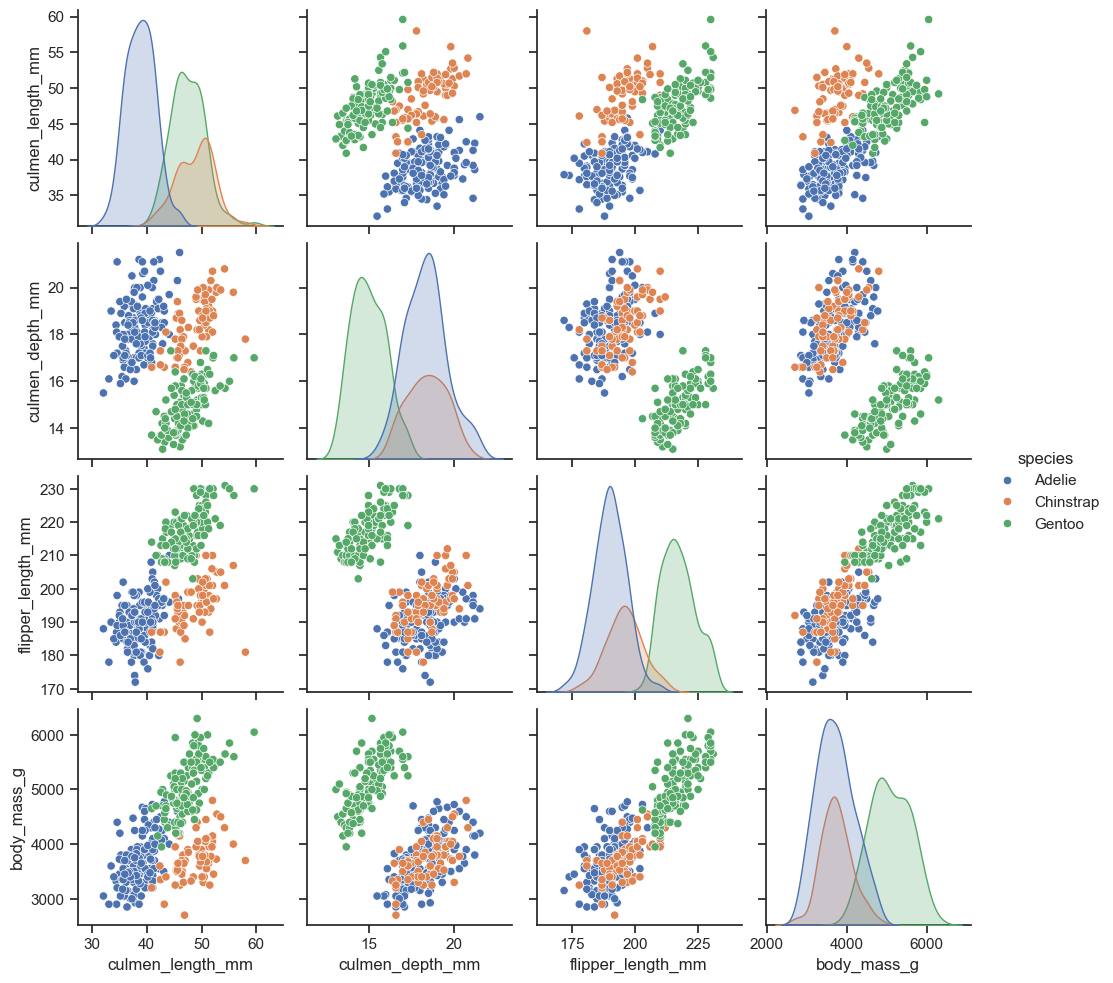

In [222]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df, hue = "species")

In [223]:
df['species'].value_counts()

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

## 2. Data Processing

Now that we've explored our data, let's prepare it for model training.

In [224]:
X = pd.get_dummies(df.drop('species', axis = 1), drop_first = True)
y = df['species']

In [225]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,True,True,False
2,40.3,18.0,195.0,3250.0,False,True,True,False
4,36.7,19.3,193.0,3450.0,False,True,True,False
5,39.3,20.6,190.0,3650.0,False,True,False,True
...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,True,False
340,46.8,14.3,215.0,4850.0,False,False,True,False
341,50.4,15.7,222.0,5750.0,False,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,True,False


### Train | Test Split

In [226]:
from sklearn.model_selection import train_test_split

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## 3. Model Building

Let's build and train our Decision Tree model.

In [228]:
from sklearn.tree import DecisionTreeClassifier

In [229]:
DTree = DecisionTreeClassifier()
DTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [230]:
preds = DTree.predict(X_test)

## 4. Evaluation

In [231]:
from sklearn import tree

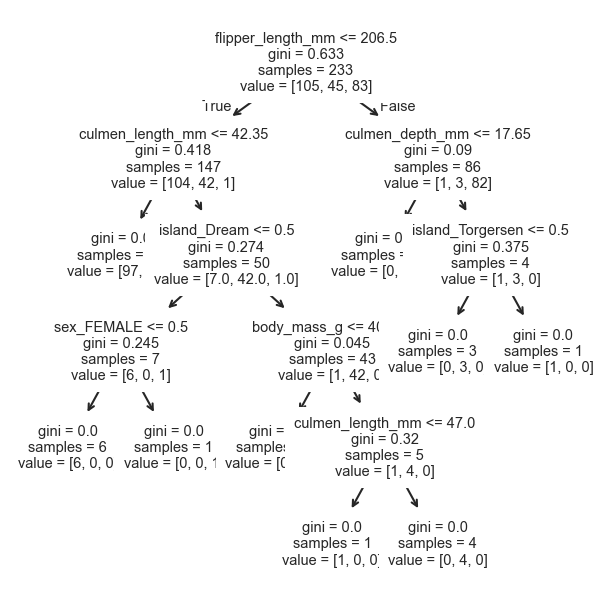

In [232]:
plt.figure(figsize = (5,5), dpi = 150)
tree.plot_tree(DTree, fontsize = 7, 
               feature_names = ['culmen_length_mm', 'culmen_depth_mm', 
                                'flipper_length_mm','body_mass_g', 
                                'island_Dream', 'island_Torgersen', 
                                'sex_FEMALE','sex_MALE']);

In [233]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score

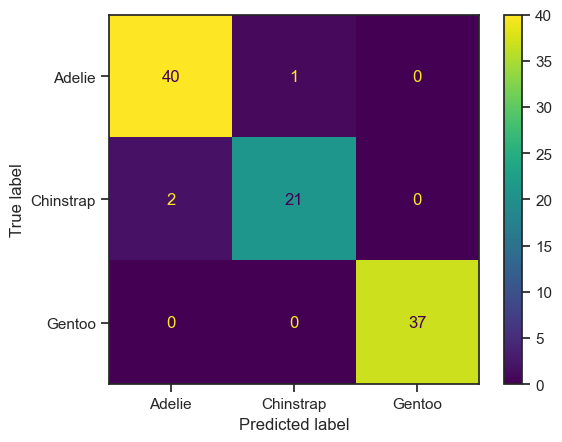

In [234]:
cm = confusion_matrix(y_test, preds)
CM_plot = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                 display_labels=DTree.classes_)
CM_plot.plot()

In [235]:
print("Accuracy Score:", accuracy_score(y_test, preds))
print("\nClassification Report:")
print(classification_report(y_test, preds))

Accuracy Score: 0.9702970297029703

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



### Understanding the Metrics

The classification report above shows several key metrics for each penguin species:

1. **Precision**: 
   - Measures how many of our predicted species were actually correct
   - Formula: True Positives / (True Positives + False Positives)
   - High precision means when we predict a penguin is of a certain species, we're usually right
   - Example: If precision for Adelie is 0.90, when we predict a penguin is Adelie, we're right 90% of the time

2. **Recall**: 
   - Measures how many of the actual species we correctly identified
   - Formula: True Positives / (True Positives + False Negatives)
   - High recall means we successfully identify most penguins of a particular species
   - Example: If recall for Gentoo is 0.95, we correctly identify 95% of all actual Gentoo penguins

3. **F1-Score**:
   - The harmonic mean of precision and recall
   - Formula: 2 * (Precision * Recall) / (Precision + Recall)
   - Balances both precision and recall
   - A high F1-score indicates good balance between precision and recall

4. **Support**:
   - The number of samples for each species in the test set
   - Helps understand if our dataset is balanced across species

# Random Forests

## 1. Data Loading and Exploration

In this section, we'll load and explore the Palmer Penguins dataset again. Remember this dataset contains physical measurements of three penguin species: Chinstrap, Adélie, and Gentoo.

In [236]:
df = pd.read_csv("datasets/penguins_size.csv")

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [238]:
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## 2. Data Processing

This section focuses on preparing our data for modeling. We'll perform the following steps:
1. Handle missing values
2. Convert categorical variables using one-hot encoding
3. Split the data into training and testing sets

In [239]:
X = pd.get_dummies(df.drop('species', axis= 1), drop_first = True)
y = df['species']

### Train | Test Split

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## 3. Model Building

In this section, we'll create and train our Random Forest model. We'll explore:
1. Basic Random Forest implementation
2. Hyperparameter tuning
3. Model optimization through grid search

### Random Forest Classification

In [241]:
from sklearn.ensemble import RandomForestClassifier

In [242]:
# use 10 random trees
model = RandomForestClassifier(n_estimators = 10, max_features = 'sqrt', random_state = 101)

In [243]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [244]:
preds = model.predict(X_test)

## 4. Evaluation

This section focuses on evaluating our model's performance using various metrics:
1. Confusion Matrix
2. Classification Report
3. Feature Importance Analysis
4. Model Performance Analysis with different numbers of trees

In [245]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score 

In [246]:
# remember, it takes the labels that we kept for testing the model (y-test and comapares it to the predicted labels (preds))
cm = confusion_matrix(y_test, preds)

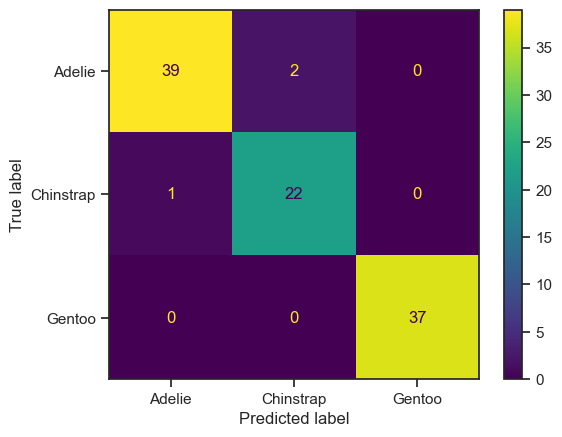

In [247]:
CM_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
CM_plot.plot()

In [248]:
print("Accuracy Score:", accuracy_score(y_test, preds))
print("\nClassification Report:")
print(classification_report(y_test, preds))

Accuracy Score: 0.9702970297029703

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



### Feature Importance

Very useful attribute of the trained model

In [249]:
model.feature_importances_

array([0.31867744, 0.1018487 , 0.17343398, 0.21316964, 0.14512091,
       0.03720114, 0.00632264, 0.00422556])

In [250]:
for name, score in zip(X.columns, model.feature_importances_):
    print(name, '-', score)

culmen_length_mm - 0.31867744116908286
culmen_depth_mm - 0.101848696496127
flipper_length_mm - 0.17343397667837027
body_mass_g - 0.21316963689525723
island_Dream - 0.14512091157898047
island_Torgersen - 0.03720113844641386
sex_FEMALE - 0.006322637791303418
sex_MALE - 0.0042255609444649496


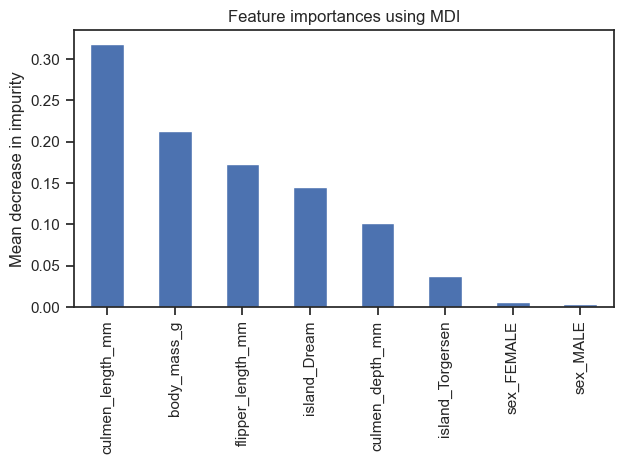

In [252]:
forest_importances = pd.Series(model.feature_importances_, index=X.columns)
forest_importances = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Choosing correct number of trees

Let's explore if continually adding more trees improves performance...

In [253]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='sqrt')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
 

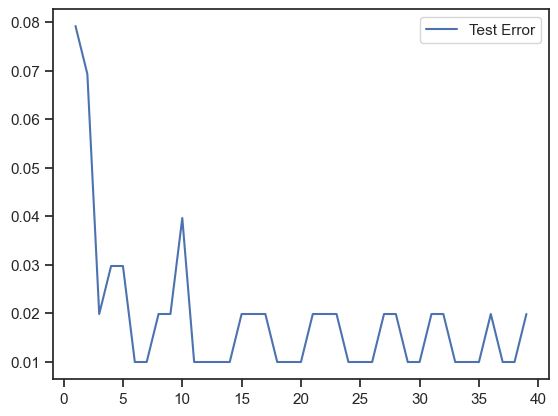

In [254]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

# Model Performance Analysis

Our Random Forest model for penguin classification shows several interesting characteristics:

1. **Classification Performance**:
   - The confusion matrix above visualizes the model's predictions vs actual species
   - Diagonal elements show correct predictions
   - Off-diagonal elements indicate misclassifications between species
   - With 10 trees, we can see how well the ensemble performs compared to a single decision tree

2. **Feature Importance**:
   - The feature importance plot shows which measurements are most crucial for species identification
   - This provides valuable insights for researchers about which physical characteristics are most distinctive between species
   - Helps prioritize which measurements to take in the field

3. **Number of Trees Analysis**:
   - The error plot shows how model performance changes with different numbers of trees
   - We can observe if adding more trees reduces error or if we reach diminishing returns
   - This helps us choose an optimal number of trees balancing accuracy and computational cost

4. **Advantages Over Single Decision Tree**:
   - Random Forest reduces overfitting through ensemble learning
   - More robust predictions by combining multiple trees
   - Better generalization to new penguin samples

# Exercises Decision Trees and Random Forests

## Exercise 1. Random Forest Classifier

### 0. Setup

In [255]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os

### 1. Data Loading

In [256]:
df = pd.read_csv('datasets/loan_data.csv')
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


### 2. Data Processing

In [257]:
df.info()
# df['Gender'].value_counts()
# df['Married'].value_counts()
# df['Education'].value_counts()
df['Dependents'].value_counts()
# df['Self_Employed'].value_counts()
# df['Property_Area'].value_counts()
# df['Loan_Status'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64

In [258]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [259]:
# Use Simple Imputer to fill missing values in Loan Amount Term
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

df['Loan_Amount_Term'] = imputer.fit_transform(df[['Loan_Amount_Term']])


In [260]:
# recode 3+ in Dependents
df['Dependents'] = df['Dependents'].replace('3+' , 3).astype(float) 


In [261]:
# drop rows with NA
df.dropna(inplace = True)

In [262]:
# Use the LabelEncoder to convert categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include = 'object').columns:
    df[col] = le.fit_transform(df[col])

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            317 non-null    int32  
 1   Gender             317 non-null    int32  
 2   Married            317 non-null    int32  
 3   Dependents         317 non-null    float64
 4   Education          317 non-null    int32  
 5   Self_Employed      317 non-null    int32  
 6   ApplicantIncome    317 non-null    int64  
 7   CoapplicantIncome  317 non-null    float64
 8   LoanAmount         317 non-null    float64
 9   Loan_Amount_Term   317 non-null    float64
 10  Credit_History     317 non-null    float64
 11  Property_Area      317 non-null    int32  
 12  Loan_Status        317 non-null    int32  
dtypes: float64(5), int32(7), int64(1)
memory usage: 26.0 KB


In [264]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,2,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,3,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,4,1,1,0.0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


#### Train | Test Split

In [265]:
# Create a training and test set
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 0)

#### Feature Scaling

In [266]:
# Use the Standard Scaler to scale the features
from sklearn.preprocessing import StandardScaler
sta = StandardScaler()
X_train = sta.fit_transform(X_train)
X_test = sta.fit_transform(X_test)

### 3. Model Building

In [267]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion = 'entropy', random_state = 42)
model.fit(X_train, y_train)



RandomForestClassifier(criterion='entropy', random_state=42)

### 4. Evaluation

In [268]:
preds = model.predict(X_test)

In [269]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        31
           1       0.78      1.00      0.88        65

    accuracy                           0.81        96
   macro avg       0.89      0.71      0.73        96
weighted avg       0.85      0.81      0.79        96



In [270]:
for i in zip(X.columns, model.feature_importances_):
    print(i)

('Gender', 0.026532652558526982)
('Married', 0.024989225644659923)
('Dependents', 0.04615422989294977)
('Education', 0.023695439624207743)
('Self_Employed', 0.011184143946866306)
('ApplicantIncome', 0.17009090795961646)
('CoapplicantIncome', 0.1101091252540051)
('LoanAmount', 0.18389630592703654)
('Loan_Amount_Term', 0.06226626266938388)
('Credit_History', 0.2781553809027712)
('Property_Area', 0.06292632561997619)


<Axes: >

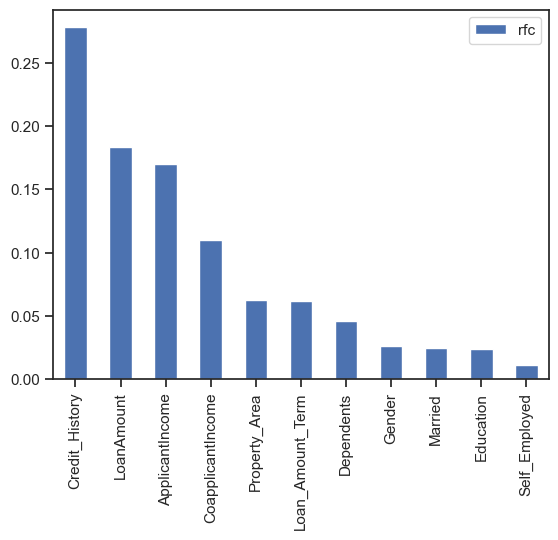

In [271]:
forest_importances = pd.DataFrame({"rfc": model.feature_importances_}, index=X.columns)
forest_importances.sort_values(by = 'rfc', ascending = False, inplace = True)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)

## Exercise 2. Random Forest Regressor

### 0. Setup

In [272]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os

### 1. Data Loading

In [273]:
melbourne_housing = pd.read_csv("datasets/melb_data.csv")
melbourne_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [274]:
melbourne_housing.dropna(inplace = True, axis = 0)

In [275]:
melbourne_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   float64
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   float64
 10  Bedroom2       6196 non-null   float64
 11  Bathroom       6196 non-null   float64
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   float64
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtitude  

### 2. Data Processing

In [276]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

X = melbourne_housing[melbourne_features]
y = melbourne_housing['Price']

#### Train | Test Split

In [277]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [278]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [279]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


### 3. Model Building

In [280]:
from sklearn.tree import DecisionTreeRegressor

In [281]:
model = DecisionTreeRegressor(random_state = 1)

In [282]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [283]:
preds = model.predict(X_test)

### 4. Evaluation

In [284]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [285]:
mean_absolute_error(y_test, preds) 

260307.4168908015

In [286]:
mean_squared_error(y_test, preds)


202120464880.33353

In [287]:
r2_score(y_test, preds)

0.5140825950589849

mean_absolute_error: Measures the average absolute difference between actual and predicted values. 

mean_squared_error: Measures the average of the squared differences. 

r2_score: Measures how well the predictions approximate the actual values..

### 5. Make predictions

Predict the house price for the first five houses in X

In [288]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[ 905000. 1465000. 1600000. 1876000. 1636000.]
